In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from rbf_neural_networks import RBFNeuralNetwork
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

In [55]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
rbf_nn = RBFNeuralNetwork(num_centers=10)
rbf_nn.fit(X_train, y_train)
y_pred = rbf_nn.predict(X_test)

OneHotEncoder is initialized.
weights: [[ 0.00598958  0.19492465 -0.00192744]
 [ 0.35801329  0.00231666 -0.00991115]
 [-0.00671569  0.15143465  0.05338167]
 [-0.00182265 -0.01780794  0.22966491]
 [-0.00654107  0.18020224  0.03248294]
 [-0.01118463  0.11706429  0.1260421 ]
 [ 0.36783689 -0.00309232 -0.00721219]
 [-0.0117596  -0.0363898   0.22141652]
 [-0.01353038  0.1044109   0.11958738]
 [ 0.07322438  0.15449785 -0.0368642 ]]


In [57]:
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

classes = np.unique(y_test)
for c in classes:
    classes_acc = np.mean(y_pred[y_test == c] == y_test[y_test == c])
    print(f"Accuracy class {c}: {classes_acc*100:.2f}%")

Test Accuracy: 96.67%
Accuracy class 0: 100.00%
Accuracy class 1: 100.00%
Accuracy class 2: 90.91%


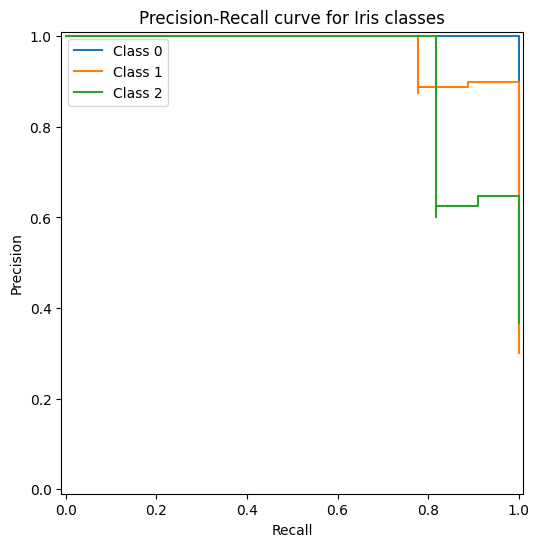

In [58]:
y_test_onehot = rbf_nn.encoder.transform(y_test.reshape(-1,1))

Phi_test = rbf_nn.compute_activations(X_test)
y_scores = Phi_test @ rbf_nn.weights  

plt.figure(figsize=(8,6))
for i in range(y_scores.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_onehot[:,i], y_scores[:,i])
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot(label=f'Class {i}', ax=plt.gca())  
plt.title('Precision-Recall curve for Iris classes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

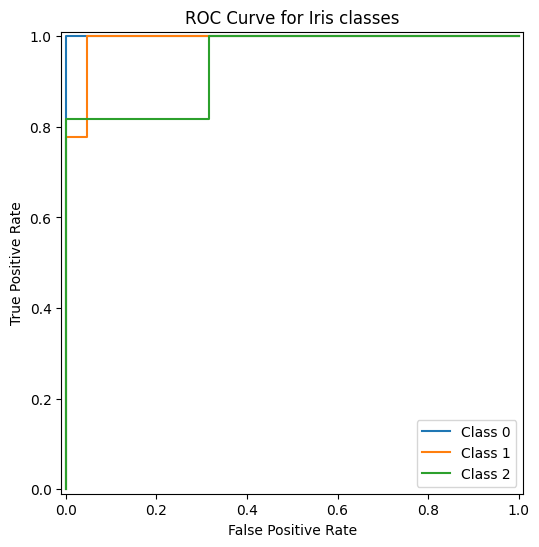

In [59]:
plt.figure(figsize=(8,6))
for i in range(y_scores.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_scores[:, i])
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
    disp.plot(curve_kwargs={"label": f"Class {i}"}, ax=plt.gca())
plt.title('ROC Curve for Iris classes')
plt.show()

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


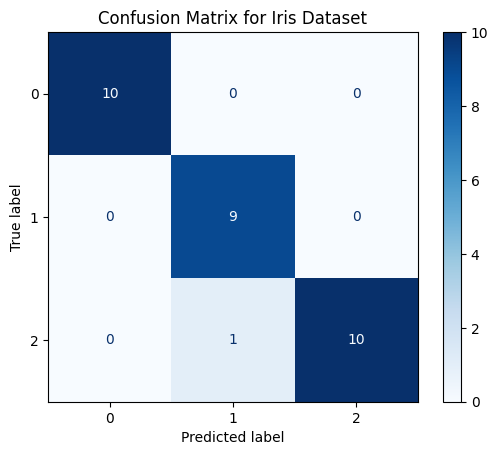

In [60]:
cm = confusion_matrix(y_test, y_pred) 
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Iris Dataset")
plt.show()
